# Part 1

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

- By running an exploratory data analysis, the project found that there is a large drop of logins related at the time of the day.
    - From 5am to 9am, there is a large drop of logins. At 6am, only 300 logins occurs.
    - Although 5am to 9am  are not regulars hours with people getting ready to work or sleeping, the drop is too significant. Therefore, I'd recommend to check if there is an issue with the system during these hours. 
    - If the system is not a problem, I'd recommend having  a look at other variables to understand what this large drop in logins is being caused by.

In [489]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

Import the json file as dataframe

In [490]:
date_time = pd.read_json('logins.json')
date_time.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Check the dataframe:
- Total entries
- Variable type

In [491]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Check the range of dates in the dataframe

In [492]:
print(max(date_time['login_time']))
print(min(date_time['login_time']))

1970-04-13 18:57:38
1970-01-01 20:12:16


To make it easier for us to analyze and investigate these entries, we will expand the dataframe with:
- Month
- Week 
- Day
- Hour 
- Minute


In [493]:
month = [x.month for x in date_time['login_time']]
week = [x.week for x in date_time['login_time']]
day = [x.weekday_name for x in date_time['login_time']]
hour = [x.hour for x in date_time['login_time']]
minutes = [x.minute for x in date_time['login_time']]

date_time['month'] = month
date_time['week'] = week
date_time['day'] = day
date_time['hour'] = hour
date_time['minutes'] = minutes

/Users/joaobecker/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [494]:
date_time.head()

,login_time,month,week,day,hour,minutes
0,1970-01-01 20:13:18,1,1,Thursday,20,13
1,1970-01-01 20:16:10,1,1,Thursday,20,16
2,1970-01-01 20:16:37,1,1,Thursday,20,16
3,1970-01-01 20:16:36,1,1,Thursday,20,16
4,1970-01-01 20:26:21,1,1,Thursday,20,26


Now, let's aggregate the time in a 15 minutes interval.

In [495]:
date_time_new = date_time.set_index('login_time')
aggregated = date_time_new.resample("15T").mean()

aggregated.head()

,month,week,hour,minutes
login_time,,,,
1970-01-01 20:00:00,1.0,1.0,20.0,12.500000
1970-01-01 20:15:00,1.0,1.0,20.0,20.166667
1970-01-01 20:30:00,1.0,1.0,20.0,36.333333
1970-01-01 20:45:00,1.0,1.0,20.0,51.857143
1970-01-01 21:00:00,1.0,1.0,21.0,9.000000


Since we are using the mean here and day is represented as a categorical and not a numerical value, it got dropped out from the dataframe. So, let's put it back and analyze how our dataframe looks like.

In [496]:
day = [x.weekday_name for x in aggregated.index]
aggregated['day'] = day

/Users/joaobecker/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


In [497]:
aggregated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 5 columns):
month      9381 non-null float64
week       9381 non-null float64
hour       9381 non-null float64
minutes    9381 non-null float64
day        9788 non-null object
dtypes: float64(4), object(1)
memory usage: 458.8+ KB


We can see that there is a some NaN. This is because we started counting for every 15 minutes and new entries were included.
    - Let's drop these NaNs. 

In [498]:
aggregated_no_na = aggregated.dropna()

# Reset index
aggregated_no_na = aggregated_no_na.reset_index()

# Check the dataframe
aggregated_no_na.head()

,login_time,month,week,hour,minutes,day
0,1970-01-01 20:00:00,1.0,1.0,20.0,12.500000,Thursday
1,1970-01-01 20:15:00,1.0,1.0,20.0,20.166667,Thursday
2,1970-01-01 20:30:00,1.0,1.0,20.0,36.333333,Thursday
3,1970-01-01 20:45:00,1.0,1.0,20.0,51.857143,Thursday
4,1970-01-01 21:00:00,1.0,1.0,21.0,9.000000,Thursday


## Exploratory Data Analysis

- We will start broad and see if there is anything 'weird' with the amount of logged ins over time.

#### Month
- We will first start exploring the month variable, and see what months had the highest and lowest amount of log ins.

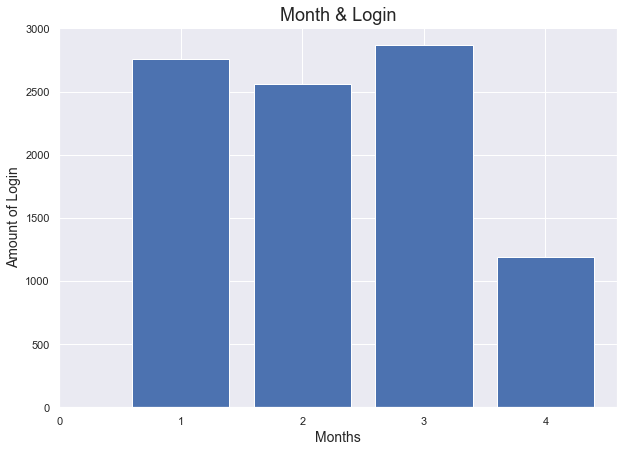

In [499]:
month_freq = aggregated_no_na.groupby('month').count()

plt.figure(figsize=(10,7))
plt.bar(month_freq.index, month_freq.hour)
plt.xticks(np.arange(5))
plt.title('Month & Login', fontsize=18)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Amount of Login', fontsize=14)
plt.show()

We can see from the above graph that April (Month - 4), had a dramatically decrease. However, this can be explained as April goes only until the 13th on this dataset.

### Week
- Let's have a look at the week variable and see if there is anything 'weird'

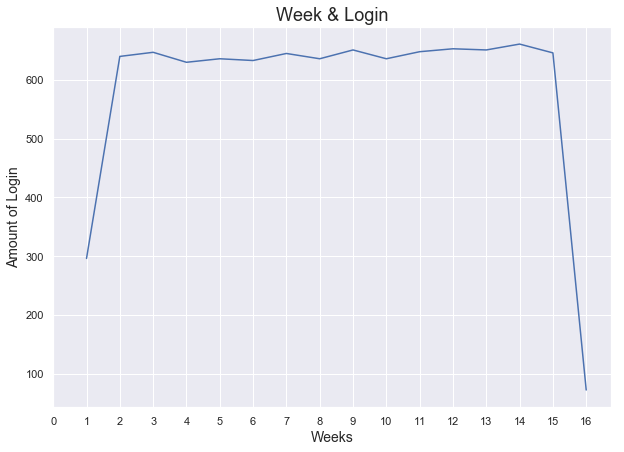

In [500]:
week_freq = aggregated_no_na.groupby('week').count()

plt.figure(figsize=(10,7))
plt.plot(week_freq.index, week_freq.hour)
plt.xticks(np.arange(len(week_freq)+1))
plt.title('Week & Login', fontsize=18)
plt.xlabel('Weeks', fontsize=14)
plt.ylabel('Amount of Login', fontsize=14)
plt.show()

In [501]:
print(aggregated_no_na[aggregated_no_na['week'] == 1].day.unique())
print(aggregated_no_na[aggregated_no_na['week'] == 16].day.unique())

['Thursday' 'Friday' 'Saturday' 'Sunday']
['Monday']


For the same reasons as the month variable, the first week had low amount of login because the week started on Thursday. While the last week had only one day.

### Day
- Let's have a look at the day variable and see if there is anything 'weird'

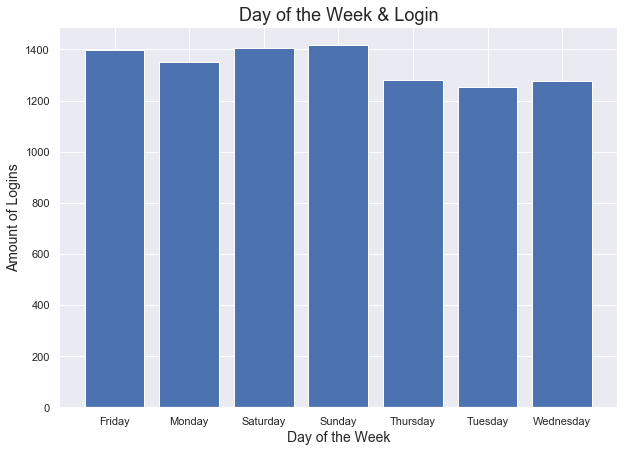

In [502]:
day_week = aggregated_no_na.groupby('day').count()

plt.figure(figsize=(10,7))
plt.bar(day_week.index, day_week.login_time)
plt.title('Day of the Week & Login', fontsize=18)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Amount of Logins', fontsize=14)
plt.show()

In [503]:
day_week['hour'].sort_values(ascending=False)

day
Sunday       1418
Saturday     1407
Friday       1396
Monday       1350
Thursday     1281
Wednesday    1276
Tuesday      1253
Name: hour, dtype: int64

Most people login on the weekend, and there is a drop of around 130 logins on Tuesday, Wednesday and Thursday.

### Hours
- Let's have a look at the hour variable and see if there is anything 'weird'

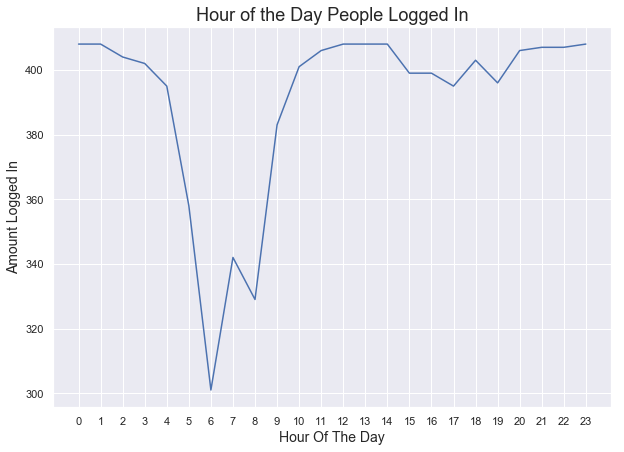

In [504]:
hour_freq = aggregated_no_na.groupby('hour').count()

plt.figure(figsize=(10,7))
plt.plot(hour_freq.index, hour_freq.minutes)
plt.xlabel('Hour Of The Day', fontsize=14)
plt.ylabel('Amount Logged In',  fontsize=14)
plt.title('Hour of the Day People Logged In',  fontsize=18)
plt.xticks(np.arange(24))
plt.show()

There is a big drop of logins at 6am. 
- It starts at 4am and at 6 it reaches almost bottom with only 300 logins.
- Number of logins increase at 7, but it doesnt reach the normal levels until 10am. 

### Minutes
- Let's have a look at the minutes variable and see if there is anything 'weird'

First, let's round minutes

In [505]:
aggregated_no_na['minutes'] = [round(x) for x in aggregated_no_na['minutes']]


aggregated_no_na.head()

,login_time,month,week,hour,minutes,day
0,1970-01-01 20:00:00,1.0,1.0,20.0,12,Thursday
1,1970-01-01 20:15:00,1.0,1.0,20.0,20,Thursday
2,1970-01-01 20:30:00,1.0,1.0,20.0,36,Thursday
3,1970-01-01 20:45:00,1.0,1.0,20.0,52,Thursday
4,1970-01-01 21:00:00,1.0,1.0,21.0,9,Thursday


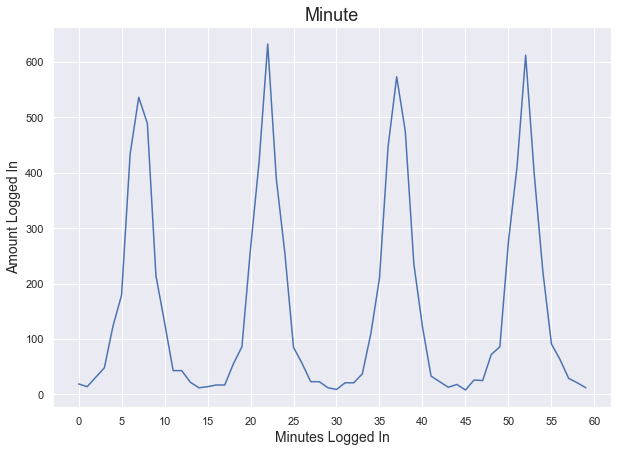

In [506]:
minute_freq = aggregated_no_na.groupby('minutes').count()


plt.figure(figsize=(10,7))
plt.plot(minute_freq.index, minute_freq.hour)
plt.xlabel('Minutes Logged In', fontsize=14)
plt.ylabel('Amount Logged In',  fontsize=14)
plt.title('Minute',  fontsize=18)
plt.xticks(np.arange(61, step=5))
plt.show()

The first quarter of the hour has the lowest amount of login, while the second quarter has the highest amount of login.

# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
    - a. how you will implement the experiment
    - b. what statistical test(s) you will conduct to verify the significance of the
observation
    - c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

##### 1 - The key measure for this experiment would be to analyze if there is an increase in the amount of drive partners on the weekend. 
    - I'd focus on the amount of drive partners on the weekend as on weekdays, people have drastically different  
    work hours

#### 2:
##### - a. To implement this experiment we would need to evaluate the average of driver partners passign through the toll bridge before and after the reimbursement program.
##### - b. I would perform an frequentist statistical test, two sample test. Since, we will have the data from before and after reimbursing toll costs.
##### - c. First we would have to analyze if we have higher than 99% confidence interval that driver partners are going through the toll after being reimbursed. 
    - In addition, I would verify if the amount of drive partners passign by the bridge is enough to cover the explain the costs of reimbursing people passing by the toll bridge.

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.


The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.


1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

## Data Wrangling

Import the json file and convert it into a DataFrame.

In [507]:
import json
from pandas.io.json import json_normalize

In [508]:
uc = json.load(open('ultimate_data_challenge.json'))

In [509]:
uc = json_normalize(uc)
uc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


## Data Exploration

In [510]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Below, we will use the describe function to understand the amount of trips drivers usually take in their first month, by analyzing the average, median and different quartiles of the total driver population

In [511]:
uc.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


Below, we will calculate the total amount of drivers that were and were not retained.

In [512]:
len(uc[uc.trips_in_first_30_days == 0])

15390

In [513]:
print("Percentage of drivers not retained - {}%".format(len(uc[uc.trips_in_first_30_days == 0]) / len(uc)*100))

Percentage of drivers not retained - 30.78%


In [514]:
print("Percentage of drivers retained - {}%".format(len(uc[uc.trips_in_first_30_days != 0]) / len(uc)*100))

Percentage of drivers retained - 69.22%


As we can see above:
- 30.78% of drivers were not retained during the first month. 
- 69.22% of drivers had at least one trip
- The average of trips in their first month is 2.27 p/ driver, while the median is 1 trip. 
- Upper quartile (75%) of drivers had 3 trips during their first month
- Driver with the most trips in the first month performed 125 trips.

#### 2 )

In [515]:
type(uc.signup_date)

pandas.core.series.Series

To know the drivers that were active on their 6 month, we will convert the last trip date into timestamp and extract the month.
- Since this dataset tracks last trips made in July. I will be considering those who performed a trip on their 7th month as if they had also performed a trip on their 6th month

In [516]:
uc['last_trip_date'] = [pd.Timestamp(x) for x in uc.last_trip_date]
uc['last_trip_month'] = [x.month for x in uc.last_trip_date]

uc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_month
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,6
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,6
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,3


In [517]:
print("Last trip performed - {}".format(str(max(uc.last_trip_date)).split(" ")[0]))

Last trip performed - 2014-07-01


In [518]:
print("Total trips performed in July - {}".format(len(uc[uc["last_trip_month"] == 7])))

Total trips performed in July - 548


In [519]:
print("Total trips performed on their 6th and 7th month - {}".format(len(uc[uc["last_trip_month"] > 5]))) 

Total trips performed on their 6th and 7th month - 18804


In [520]:
mid_year_retained = [1 if x > 5 else 0 for x in uc["last_trip_month"]]
uc["mid_year_retained"] = mid_year_retained
uc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_month,mid_year_retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,6,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,6,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,3,0


### Machine Learning

In [521]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
last_trip_month           50000 non-null int64
mid_year_retained         50000 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 5.0+ MB


In [522]:
print("Android Percentage - {}".format(round(len(uc[uc.phone == "Android"]) / len(uc)*100, 2)))
print("iPhone Percentage - {}".format(len(uc[uc.phone == "iPhone"])/ len(uc)*100))

Android Percentage - 30.04
iPhone Percentage - 69.164


In [523]:
import math

uc['avg_rating_by_driver'] = [np.mean(uc['avg_rating_by_driver']) if math.isnan(x) else x for x in uc['avg_rating_by_driver']]
uc['avg_rating_of_driver'] = [np.mean(uc['avg_rating_of_driver']) if math.isnan(x) else x for x in uc['avg_rating_of_driver']]
uc['phone'] = uc['phone'].fillna(method='ffill')



In [524]:
# Geti rid of the y target and the timestamp variables
X = uc.drop(['mid_year_retained','signup_date', 'last_trip_date'], axis=1)
X = pd.get_dummies(X)
y = uc["mid_year_retained"]

In [525]:
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_month,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,6,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,5,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,6,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,3,0,0,1,1,0


In [526]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)

#### Logistic Regression

The first machine learning model I will use is Logistic Regression.
- Why?
    - Since our y target is a binary (Yes/No) variable. 
        - Yes --> The driver had trips on his 6th month
        - No --> The driver did not have any trips on his 6th month.

- Performance
    - To improve performance I used GridSearch to perform cross validation and search for the best parameters, "C" inverse regularization strength and 'penalty' Lasso (L1) or Ridge (L2) regularization method.
    - By performing GridSearch, it found that the best parameter for our model is C = 1 and penalty = L1
    
- Other methods we can consider
    - We could consider running two extra models to see which performs better, random forest decision tree and gradient boosting.
        - Random Forest- Performs a bagging operation in a random subset of data 
        - Gradient Boosting - It uses gradient descent and boosting to reduce bias and variance.

In [527]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
L = ['l1', 'l2']

logreg = LogisticRegression()

param_grid = {'C': Cs, 'penalty':L}

logreg_cv = GridSearchCV(logreg, param_grid ,cv=5) # 5 Cross fold validation

logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)

{'C': 1, 'penalty': 'l1'}


In [536]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = LogisticRegression(C=1, penalty='l1')
model.fit(X_train, y_train)
model_pred = ≈.predict(X_test)

print(confusion_matrix(y_test, model_pred))
print(classification_report(y_test, model_pred))

[[9379    0]
 [   0 5621]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      9379
          1       1.00      1.00      1.00      5621

avg / total       1.00      1.00      1.00     15000



#### 3)

By using the model above, ultimate can predict with 100% precision who is going to be active on their 6th month after they signed up or not.

By knowing those who are not going to be active on their 6th month, Ultimate can create a specific marketing campaign to engage user that are not going to be active to take trips.